# Lógica Computacional
#### Grupo 20
* Francisco Domingos Martins Oliveira,  A82066
* José Luís Cerqueira Pires, A84552

## Trabalho Prático 1

Vamos começar por importar as ferramentas necessárias em todo o Notebook.

In [1]:
from z3 import*
import matplotlib.pyplot as plt
from timeit import timeit

### Exercício 2, Alínea a,i)

É possível usar lógica proposicional para modelar o problema de associar pombos $p$  a poleiros $pol$. Para tal, vamos necessitar de $p \times pol$ variáveis proposicionais, onde a variável $x_{p,pol}$ determina se o pombo $p$ está no poleiro $pol$.
Para cada variável $(p,pol)$, temos a seguinte restrição que obriga cada pombo ocupar um poleiro diferente.

$$
\forall_{p< pombos} \cdot \forall_{p+1 <= p2 <pombos} \quad (x_{p,pol} \rightarrow \neg x_{p2,pol})
$$

A restrição de que cada pombo $p$ ocupa totalmente um poleiro pode ser implementada por duas restrições mais simples:
1. O pombo $p$ ocupa pelo menos um poleiro $pol$.
2. O pombo $p$ não pode ocupar mais do que um poleiro $pol$.

Vamos então criar um dicionário (de dicionários) `x` para fazer o mapeamento entre o identificador de cada pombo e de cada poleiro e a respectiva variável booleana do Z3 (concretamente, `x[p][pol]` corresponde à variável $x_{p,pol}$ na modelação acima).

Iremos depois adicionar a um solver as condições que satisfazem os pontos 1 e 2.

O primeiro caso traduz-se da seguinte maneira: todo o pombo $p$ ocupa o poleiro $0$ ou poleiro $1$ ... ou o poleiro $pol-1$. Ou seja, para cada pombo $p$ a união, para cada poleiro $pol$, de todas as variaveis $x_{p,pol}$.

O segundo caso traduz-se da subsequente forma:

$$
\forall_{p < pombos} \cdot \forall_{pol < poleiros} \cdot \forall_{pol+1 <= pol2 < poleiros} \quad (x_{p,pol} \rightarrow \neg x_{p,pol2})
$$

In [2]:
def php(pombos):
    s = Solver()
    poleiros = pombos-1
    #dicionario com todos os pombos e os poleiros possiveis onde eles podem ficar
    x = {}
    for p in range(pombos):
        x[p] = {}
        for pol in range(poleiros):
            x[p][pol] = Bool(str(p)+'_'+ str(pol))
    
    #Cada pombo ocupa um poleiro diferente
    for p in range(pombos):
        for p2 in range(p+1,pombos):
            for pol in range(poleiros):
                s.add(Implies(x[p][pol],Not(x[p2][pol])))
    
    # Condição 1: cada pombo ocupa pelo menos um poleiro
    for p in range(pombos):
        s.add(Or(list(x[p].values())))
 
    # Condição 2: cada pombo nao pode ocupar mais do que um poleiro
    for p in range(pombos):
        for pol in range(poleiros):
            for pol2 in range(pol+1,poleiros):
                s.add(Implies(x[p][pol],Not(x[p][pol2])))
    
    #print(s)
    return s.check()==sat


php(10)

False

### Exercício 2, alínea a,ii)


Uma alternativa para modelar este problema com aritmética linear inteira seria usar uma técnica semelhante à modelação com lógica proposicional, ou seja usar $pombos \times poleiros$ variáveis inteiras binárias (com valor entre 0 e 1), onde a variável $x_{p,pol}$ determina se o pombo $p$ ocupa o poleiro $pol$.

Em geral, num solver para programação inteira todas as restrições devem ser equações lineares da forma $a_1 \cdot x_1 + \ldots a_n \cdot x_n \sim b$ onde $a_1, \ldots, a_n, b$ são constantes inteiras, $x_1, \ldots, x_n$ são variáveis inteiras e $\sim$ é um dos operadores de comparação $<,\leq,=,\geq,>$.

Vamos usar uma família $x_{p,pol}$ de variáveis binárias (i.e., que assumem valores inteiros $\{0,1\}$), com a seguinte semântica:

$$
x_{p,pol} == 1  \quad \mbox{se e só se} \quad \mbox{o pombo $p$ for alocado ao poleiro $pol$}
$$

Cada pombo ocupar totalmente um poleiro pode-se traduzir da seguinte forma:

$$
\forall_{p < pombos} \cdot \quad (\sum_{pol<poleiros} x_{p,pol} == 1)
$$

Alocar cada pombo a um próprio poleiro, é o mesmo que dizer que todos os poleiros têm alocados um pombo, no máximo. Isto é:

$$
\forall_{po<poleiros} \cdot \quad (\sum_{p<pombos} x_{p,pol} <= 1)
$$

In [3]:
def php2(pombos):
    s = Solver()
    poleiros = pombos-1
    x = {}
    for p in range(pombos):
        for pol in range(poleiros):
            x[p,pol] = Int(str(p)+'_'+str(pol))

    #cada pombo ocupa totalmente um poleiro
    for p in range(pombos):
        s.add(Sum([x[p,pol] for pol in range(poleiros)])==1)
        
    #cada poleiro tem no maximo um pombo
    for pol in range(poleiros):
        s.add(Sum([x[p,pol] for p in range(pombos)])<=1)
        
    return s.check()==sat

        
php2(50)

False

### Exercício 2, alínea b)

Para apreciar a diferença de eficiência e melhor verificar a complexidade entre os algoritmos vamos usar a função `timeit` da biblioteca `timeit`, que permite executar várias vezes um comando para depois se calcular o tempo médio.

In [4]:
for pombos in range(1,11):
    print("Número de pombos:",pombos)

    print("LP:",timeit(setup="from __main__ import php,pombos",\
           stmt="php(pombos)",number=3)/3)
    
    print("LLI:",timeit(setup="from __main__ import php2,pombos",\
           stmt="php2(pombos)",number=3)/3)
    print("\n")

Número de pombos: 1
LP: 0.009968233333333151
LLI: 0.009278233333333219


Número de pombos: 2
LP: 0.009897800000000068
LLI: 0.0097186666666668


Número de pombos: 3
LP: 0.010867833333333484
LLI: 0.010157133333333235


Número de pombos: 4
LP: 0.014148400000000136
LLI: 0.012565400000000023


Número de pombos: 5
LP: 0.017428833333333078
LLI: 0.01290263333333345


Número de pombos: 6
LP: 0.024261066666666647
LLI: 0.013445433333333293


Número de pombos: 7
LP: 0.03650036666666671
LLI: 0.014390799999999851


Número de pombos: 8
LP: 0.05931340000000004
LLI: 0.015728200000000154


Número de pombos: 9
LP: 0.25536053333333353
LLI: 0.017546899999999848


Número de pombos: 10
LP: 0.8152638333333329
LLI: 0.018076033333333186




De seguida vamos apresentar os gráficos do tempo relativo ao número de pombos.

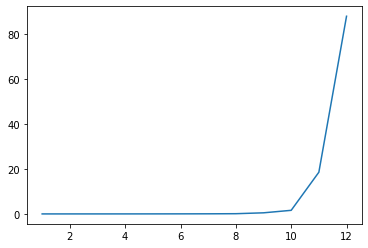

In [7]:
#a fazer tentativa erro escolhemos entre 1 e 13 pois se >13 iria demorar demasiado tempo 
plt.plot(range(1, 13), [timeit(setup="from __main__ import php", \
       stmt=f"php({x})", number = 2) for x in range(1, 13)])
plt.show()

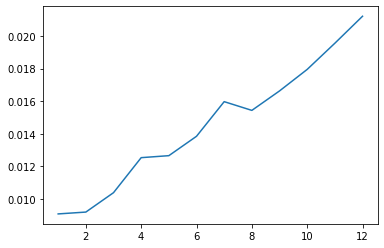

In [16]:
plt.plot(range(1, 13), [timeit(setup="from __main__ import php2", \
       stmt=f"php2({x})", number = 1) for x in range(1, 13)])
plt.show()

Para obter uma imagem mais clara do tempo de execução aumentamos o numero de pombos para 200 na prova por lógica inteira linear. 

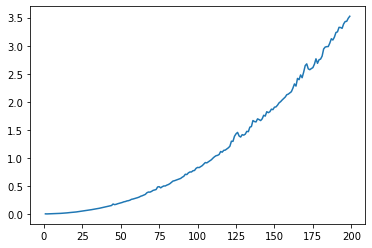

In [11]:
plt.plot(range(1, 200), [timeit(setup="from __main__ import php2", \
       stmt=f"php2({x})", number = 1) for x in range(1, 200)])
plt.show()

Depois de analisar os gráficos, podemos concluir que usando Lógica Proposicional para resolver este problema não é muito eficiente para números elevados de pombos , tendo esta um tempo de execução exponencial enquanto que Lógica Linear Inteira têm um tempo de execução